 # Car Price with Multiple Linear Regression

 # Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import scale

 # Read the Data

In [2]:
df = pd.read_csv('../input/car-price-prediction/CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

 #### Dataset is clean and no substitution of Null values is required

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

  # Data Cleaning and Preparation

In [8]:
#Splitting company name from CarName column
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)

In [9]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
#Checking for duplicates
df.loc[df.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [12]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

 # EDA

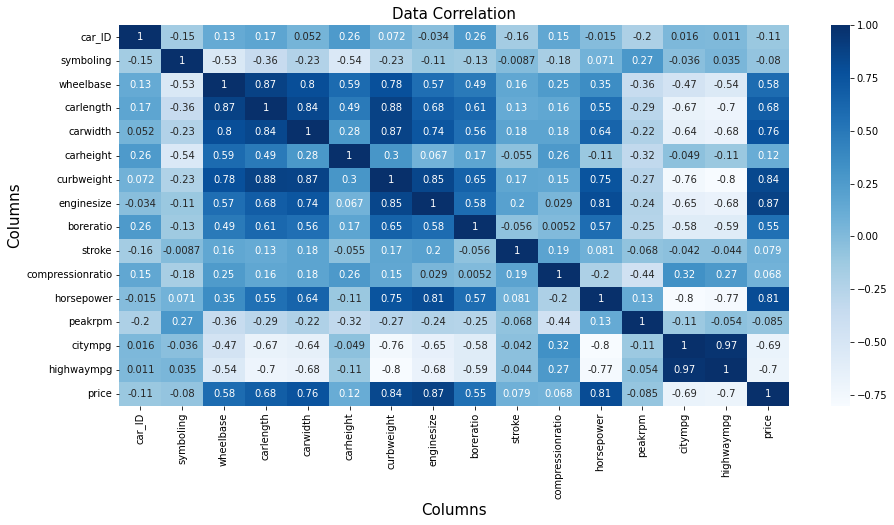

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.title("Data Correlation",size=15)
plt.ylabel("Columns",size=15)
plt.xlabel("Columns",size=15)
plt.show()

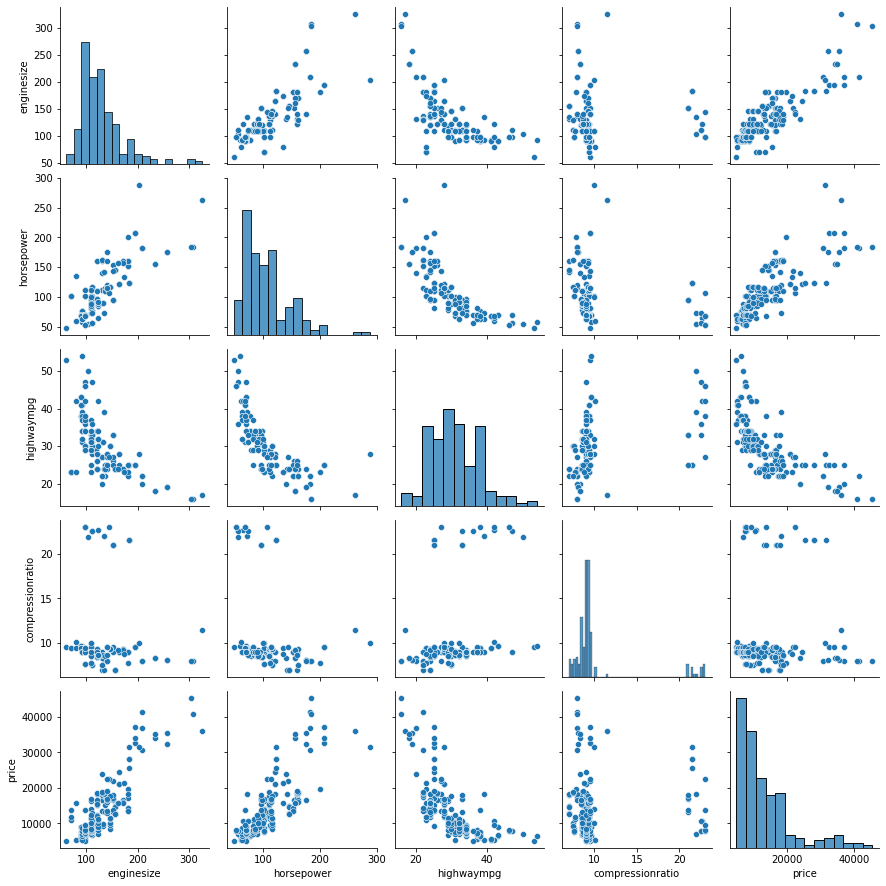

In [14]:
columns=df[["enginesize","horsepower","highwaympg","compressionratio","price"]]
sns.pairplot(columns)
plt.show()

 # Dependent variable visualization: Price

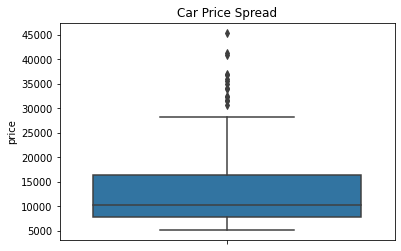

In [15]:
plt.title('Car Price Spread')
sns.boxplot(y=df.price)
plt.show()

 #### The price field has an average around 13K and a median around 10k with the most expensive car values at 45k and the cheapest cars at 5k.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


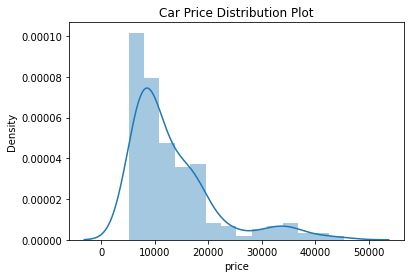

In [16]:
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)
plt.show()

 #### Since we have mean > median, then our distribution is positively asymmetric, right skewed.

 # Visualising Categorical Data

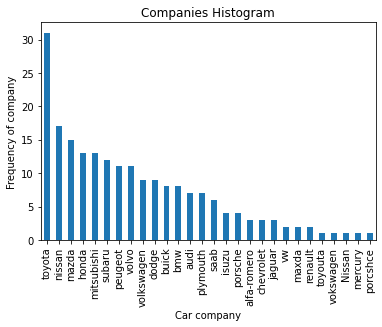

In [17]:

plt1 = df.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.show()

 ####  Toyota seemed to be favored car company.

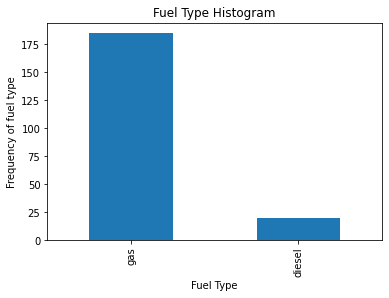

In [18]:

plt1 = df.fueltype.value_counts().plot(kind= 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.show()

 #### Number of gas fueled cars are more than diesel.

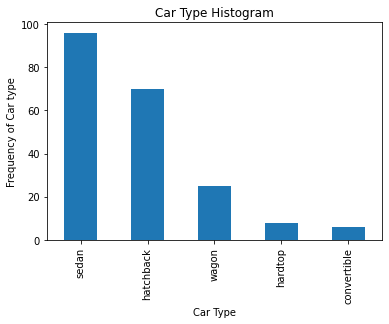

In [19]:
plt1 = df.carbody.value_counts().plot(kind= 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')
plt.show()

 #### Sedan is the top car type prefered.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


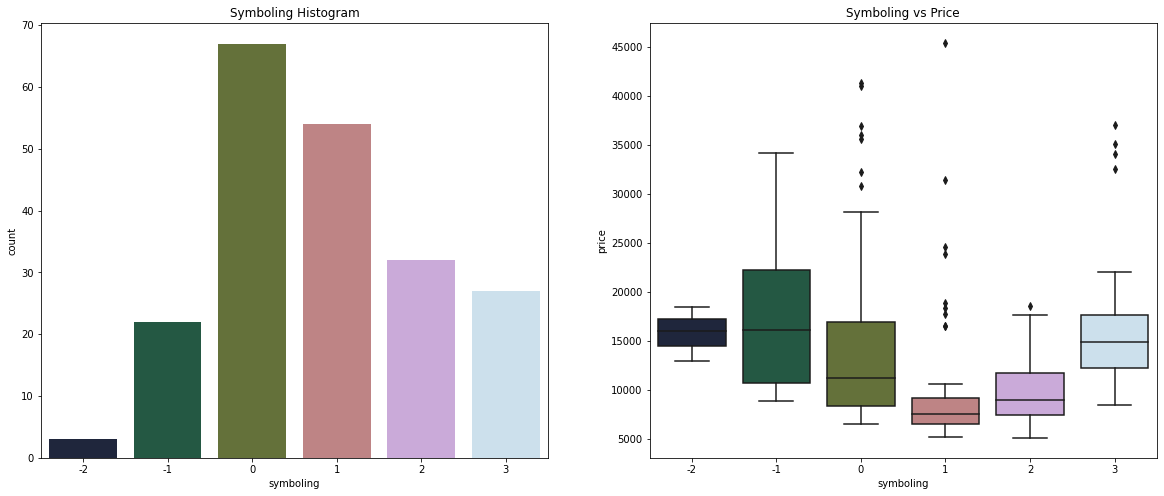

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

plt.show()

 ####  The cars with -1 symboling seems to be high priced.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Engine Type Histogram'}, xlabel='enginetype', ylabel='count'>

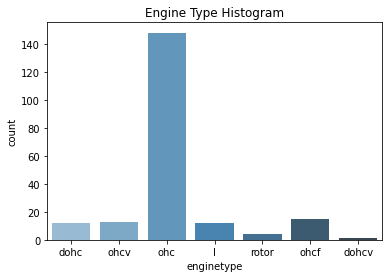

In [21]:
plt.title('Engine Type Histogram')
sns.countplot(df.enginetype, palette=("Blues_d"))

 #### ohc Engine type seems to be most favored type.

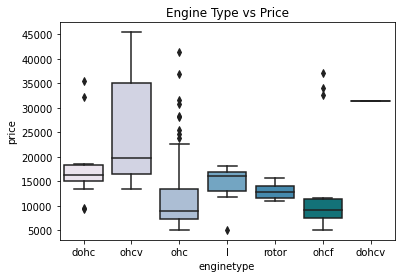

In [22]:
plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))

plt.show()

#### ohcv has the highest price range

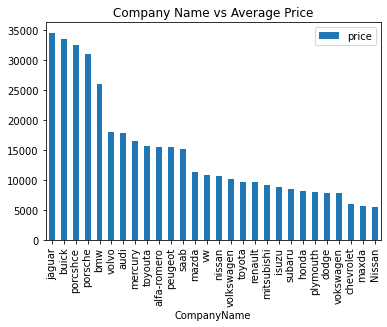

In [23]:
df1 = pd.DataFrame(df.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

#### Jaguar and Buick seem to have highest average price.

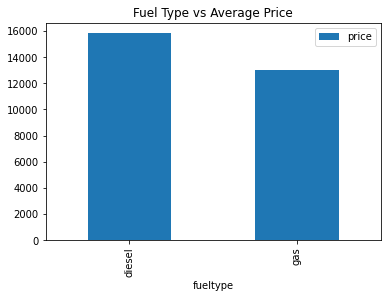

In [24]:
df2 = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df2.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

#### diesel has higher average price than gas.

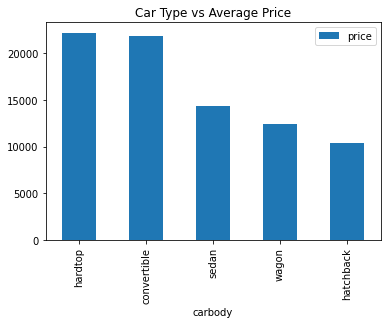

In [25]:
df3 = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df3.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

#### hardtop and convertible have higher average price.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Door Number Histogram'}, xlabel='doornumber', ylabel='count'>

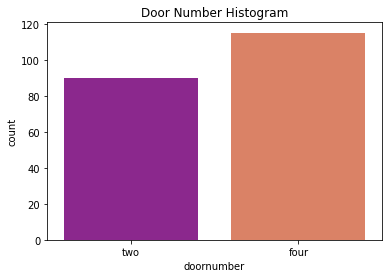

In [26]:
plt.title('Door Number Histogram')
sns.countplot(df.doornumber, palette=("plasma"))

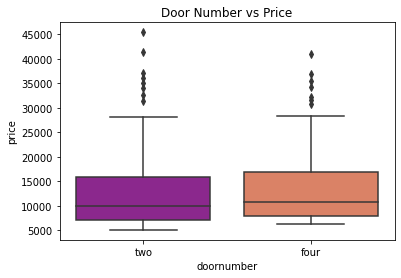

In [27]:
plt.title('Door Number vs Price')
sns.boxplot(x=df.doornumber, y=df.price, palette=("plasma"))

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Aspiration Histogram'}, xlabel='aspiration', ylabel='count'>

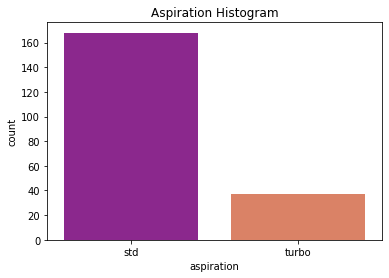

In [28]:
plt.title('Aspiration Histogram')
sns.countplot(df.aspiration, palette=("plasma"))

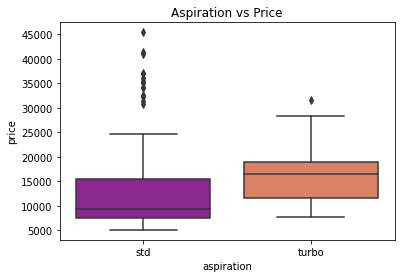

In [29]:
plt.title('Aspiration vs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=("plasma"))

plt.show()

#### 1- Doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.

#### 2- It seems aspiration with turbo have higher price range than the std (though it has some high values outside the whiskers.)

 # Visualising numerical data

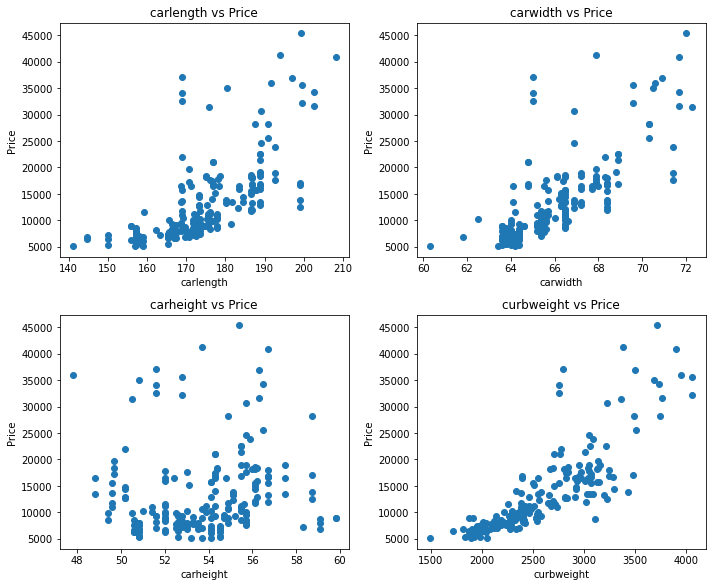

In [30]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

#### carwidth, carlength and curbweight seems to have a poitive correlation with price.

 # Data Preprocessing

### Checking Outliers

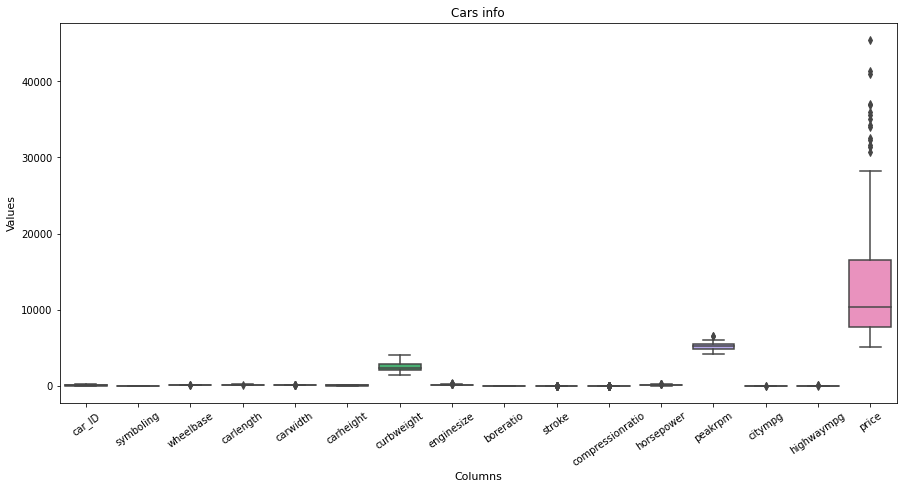

In [31]:
plt.figure(figsize=(15,7))
chart=sns.boxplot(data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=35)
plt.title("Cars info")
plt.ylabel("Values",size=11)
plt.xlabel("Columns",size=11);

In [32]:
outlier=df["price"]
Q1=outlier.quantile(0.25)
Q3=outlier.quantile(0.75)
IQR=Q3-Q1
underoutliers=Q1-1.5*IQR
upperoutliers=Q3+1.5*IQR
under_border=(outlier<underoutliers)
upper_border=outlier>upperoutliers

In [33]:
### Fixation of outlier values with lower and upper values
outlier[under_border]=underoutliers
outlier[upper_border]=upperoutliers

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


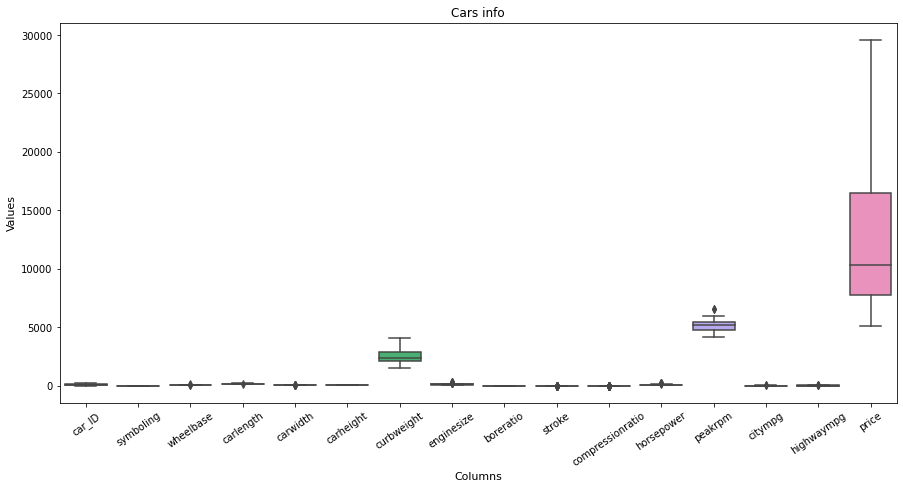

In [34]:
### Adding fixed values to the main dataframe
withoutoutlier=pd.DataFrame(outlier)
withoutoutlierdata=pd.concat([df.drop("price",axis=1),withoutoutlier],axis=1)
#
plt.figure(figsize=(15,7))
chart=sns.boxplot(data=withoutoutlierdata)
chart.set_xticklabels(chart.get_xticklabels(),rotation=35)
plt.title("Cars info")
plt.ylabel("Values",size=11)
plt.xlabel("Columns",size=11);

In [35]:
X=withoutoutlierdata.drop(["price","car_ID","symboling"],axis=1)
y=withoutoutlierdata["price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

 # Building and testing machine learning models


In [36]:
df.duplicated().sum()

0

In [37]:
df = pd.get_dummies(df)

In [38]:
X = df.drop(['car_ID','price'],axis=1)
y = df['price']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((164, 80), (41, 80), (164,), (41,))

# Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8823897471818499

# Lasso Regression

In [41]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8934178198032434

# Ridge Regression

In [42]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9107864722928746

 # KNN

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
x_kk = df.iloc[:, :-1].values
y_kk = df['price'].values
xtrain_kk, xtest_kk, ytrain_kk, ytest_kk = train_test_split(x_kk, y_kk, test_size=0.3, random_state=1)
L=[];
for i in range(3,15,2):
    M=[];
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain_kk, ytrain_kk)
    y_pred = knn.predict(xtest_kk)
    rmse = np.sqrt(mean_squared_error(ytest_kk, y_pred))
    M.append(i);
    M.append(rmse);
    L.append(M);
min=L[0];
for i in range(len(L)):
    if L[i][1]<min[1]:
        min=L[i];
n=min[0];
print(n);

3


In [44]:
knn = KNeighborsRegressor(n_neighbors=n)
knn.fit(xtrain_kk, ytrain_kk)
ytrainpredict_kk = knn.predict(xtrain_kk)
ytestpredict_kk = knn.predict(xtest_kk)

In [45]:
print(f'MAE train: {metrics.mean_absolute_error(ytrain_kk, ytrainpredict_kk)}, test: {metrics.mean_absolute_error(ytest_kk, ytestpredict_kk)}')
print(f'RMSE train: {np.sqrt(metrics.mean_squared_error(ytrain_kk, ytrainpredict_kk))}, test: {np.sqrt(metrics.mean_squared_error(ytest_kk, ytestpredict_kk))}')
print(f'R^2 train: {(r2_score(ytrain_kk, ytrainpredict_kk))}, test: {(r2_score(ytest_kk, ytestpredict_kk))}')
print(f'MSE train: {(mean_squared_error(ytrain_kk, ytrainpredict_kk))}, test: {(mean_squared_error(ytest_kk, ytestpredict_kk))}')

MAE train: 92.1969673659673, test: 183.42114516129024
RMSE train: 168.83425207583153, test: 324.525479605811
R^2 train: 0.9993810072381704, test: 0.9974718576533931
MSE train: 28505.004674005428, test: 105316.78691338164


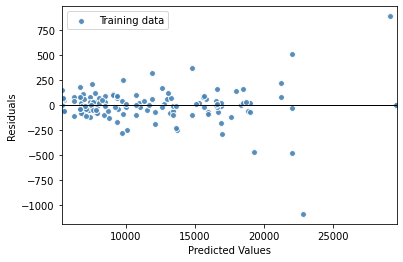

In [46]:
plt.scatter(ytrainpredict_kk, ytrainpredict_kk-ytrain_kk, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Training data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_kk.min()-2, xmax=ytrainpredict_kk.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_kk.min()-1, ytrainpredict_kk.max()+1])
plt.show()

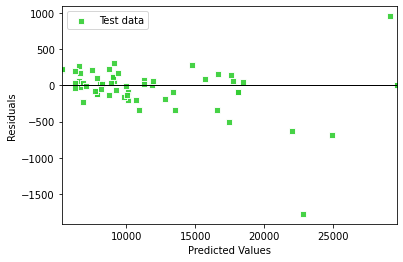

In [47]:
plt.scatter(ytestpredict_kk, ytestpredict_kk-ytest_kk, c='limegreen', marker='s', edgecolors='white', s=35, alpha=0.9, label="Test data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_kk.min()-1, xmax=ytestpredict_kk.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_kk.min()-1, ytestpredict_kk.max()+1])
plt.show()